## Assignment 1 ; AA 609 ; Parth Kothari - 2303121012

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

The ode to solve is as follows:
$$ \frac{dy}{dx} = -xy $$
$$\int \frac{dy}{dx} = \int -xy  $$
$$\int \frac{dy}{y} = \int -xdx  $$
$$ln(y) = \frac{-x^{2}}{2} + c $$
The Boundary condition is $y(0) = 1$ ; Therefore  c = 0 and the solution becomes:
$$ y = e^{\frac{-x^{2}}{2}} $$

In [2]:
#Analytical solution 
N = 25                      # Number of points
x = np.linspace(0,1,N)        # Initializing the grid
y_ana = np.exp(-x**2 / 2)     # Values of function in analytical form.
dx = x[1] - x[0]                       #Delta x or h value
# I will use the same number of points for all methods.

## Euler method

The recursion I am using here is:

$y(x + \Delta x) = y(x) + \Delta xf(x,y)$ \
$y(x + \Delta x) = y(x) - \Delta y(x)x$ \
$y(x + \Delta x) = y(x)[1 - \Delta x]$ \
$y_{i+1} = y_{i} [1 - hx_{i} ] $ 


As : h = $\Delta x$

In [3]:

y_euler = [1]                          #Initial Value for the function
for i in range(N-1):                   #As usual I have the first value therefore so only 24 value iteration
    D = y_euler[i]*(1 - (x[i] * dx))   #Numerical value calculation
    y_euler.append(D)


## RK2
recursion I am using for this algorithm: 

$k1 = -hx_{i}y{i}$ \
$k2 = -h(y_{i} + k1)(x_{i} + h)$ \
$y_{i+1} = y_{i} + \frac{k1 + k2}{2}$

Instead of using function f(x,y), I have directly used it in the equation.
In k2 I am multiplying after adding the increment of k1 and h respectively.

In [4]:
y_RK2 = [1]

for i in range(N-1):
    k1 = -dx * x[i] * y_RK2[i]                # Same algorithm as above.
    k2 = -dx * (x[i] + dx) * (y_RK2[i] + k1)
    D = y_RK2[i] + (k1 / 2) + (k2/2)
    y_RK2.append(D)


## RK 4 

Algorithm for RK4:

$k1 = (-dx) (x_{i}y_{i})$ \
$k2 =(-dx)(y_{i} + \frac{k1}{2})(x_{i} + \frac{dx}{2})$ \
$k3 = (-dx)(y_{i} + \frac{k2}{2})(x_{i} + \frac{dx}{2})$ \
$k4 = (-dx)(y_{i} + k3)(x_{i} + dx)$ \
$y_{i+1} = y_{i} + \frac{k_{1} + 2k_{2} +2k_{3} + k_{4} }{6} $

In [5]:
y_RK4 = [1]


for i in range(N-1):
    k1 = -dx * x[i] * y_RK4[i]
    k2 = -dx *(y_RK4[i] + (k1/2)) * (x[i] + (dx/2))
    k3 = -dx *(y_RK4[i] + (k2/2)) * (x[i] + (dx/2))
    k4 = -dx * (y_RK4[i] + k3) * (x[i] + dx)
    D = y_RK4[i] + (k1 + 2*k2 + 2*k3 + k4) / 6 
    y_RK4.append(D)

#plt.plot(x,y,label='analy')
#plt.plot(x,y_RK4)
    

## Backward Euler
Algorithm For Backward Euler:

$y_{n+1} = y_{n} + dx f(x_{n+1},y_{n+1})$ \
$f(x_{n+1},y_{n+1}) = -x_{n+1}y_{n+1}$ \
$y_{n+1} = y_{n} - dx x_{n+1}y_{n+1}$ \
$y_{n+1} + dx x_{n+1}y_{n+1} = y_{n}$ \
$y_{n+1}[1 + dx x_{n+1}] = y_{n}$ \
$y_{n+1} = \frac{y_{n}}{1 + dx x_{n+1}} $

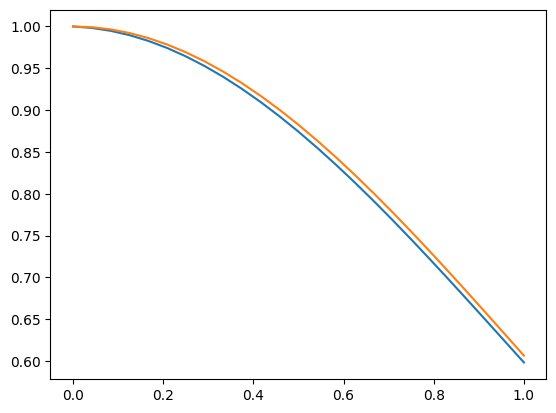

In [6]:


y_backward = [1]
for i  in range(1,N):
    D = y_backward[-1] / ((dx * x[i])+ 1)
    y_backward.append(D)
plt.plot(x,y_backward)
plt.plot(x,y_ana)

Error  = $\frac{1}{N} * \sum_{n=1}^{N} |(y_{ana({i})} - y_{num({i})})| $

Error in Euler: 0.00695519353352291 
Error in RK2: 8.554543853365183e-06 
Error in RK4: 3.7508222749949026e-10 
Error in Backward Euler: 0.00670818924965122 


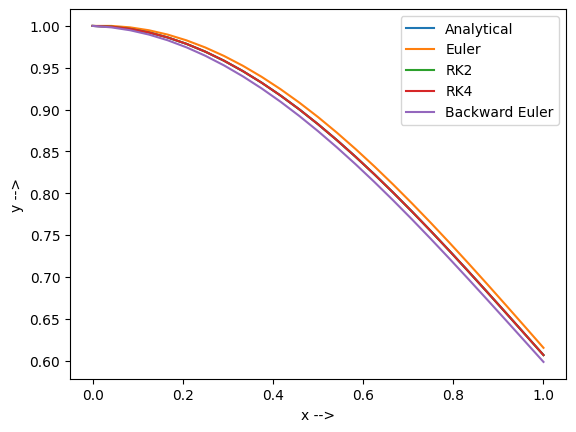

In [8]:
# Plotting all the numerical values with analytical 
ALL_Y = [y_ana,y_euler,y_RK2,y_RK4,y_backward]
labels = ['Analytical', 'Euler', 'RK2', 'RK4','Backward Euler']
for i,j in zip(ALL_Y,labels):
    plt.xlabel('x -->')
    plt.ylabel('y -->')
    plt.plot(x,i,label = j)
    plt.legend()
 
All_Y2 = [y_euler,y_RK2,y_RK4,y_backward]
label = [ 'Euler', 'RK2', 'RK4','Backward Euler']
for i,j in zip(All_Y2,label):
    C = (1/N) * np.sum(np.abs(y_ana - i))
    print(f'Error in {j}: {C} ')

## Question 2


We have to solve a Second order differential equation given by:
$$\frac{d^{2}u}{d\theta^2} + u = \frac{1}{a(1-e^{2})} $$
where u = $\frac{1}{r}$, a = 5.0 and e = 0.8.

We will solve this equation by splitting it into 2 first order DE:

$\frac{du}{d\theta} = b $ and 

$\frac{db}{d\theta} = \frac{1}{a(1-e^{2})} - u $


## Euler method


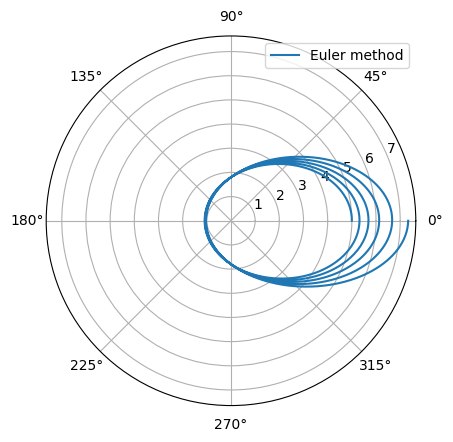

In [8]:
# Constants
a = 5.0 ; e = 0.8

def constant(t,v):                  # Defining the constant itself so that code looks clean
    return 1 / (t*(1 - v**2))  

N = 3000
Theta = np.linspace(0,10*np.pi,N)    #Initializing the orbit grid from o to 2pie
d_theta = Theta[1] - Theta[0]
u = [1/a]
du_dtheta = [0]


for i in range(N-1):
    E = u[i] + du_dtheta[i] * d_theta                        # Updating the u values
    V = du_dtheta[i] + d_theta*(constant(a, e)  -  u[i] )    # Updating the du/d theta values
    u.append(E)
    du_dtheta.append(V)


u = np.array(u)
r = 1 / u                                                    # Finally inverting the values as u = 1/r

plt.polar(Theta, r,label = 'Euler method')
plt.legend()




## RK 2 method


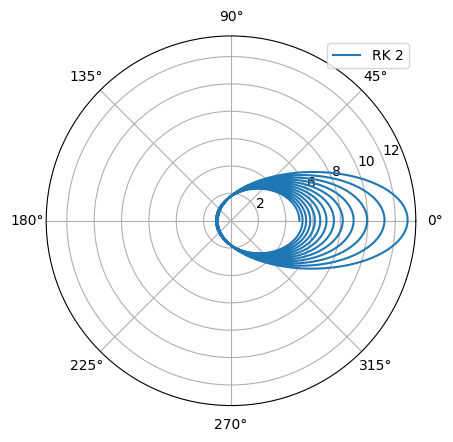

In [9]:

a = 5.0 ; e = 0.8

def constant(t,v):                  # Defining the constant itself so that code looks clean
    return 1 / (t*(1 - v**2))  

N1 = 10000
Theta1 = np.linspace(0,25*np.pi,N1)    #Initializing the orbit grid from o to 2pie
d_theta1 = Theta1[1] - Theta1[0]

u_RK2 = [1/a]
du_dtheta_RK2 = [0]

for i in range(N1-1):
    k1 = d_theta1 * du_dtheta_RK2[i]
    k2 = d_theta1 * (du_dtheta_RK2[i] + k1/2)
    u_n_1 = u_RK2[i] + (k1 / 2) + (k2/2)
    u_RK2.append(u_n_1) 
    k1_R = d_theta1 * (constant(a,e) - u_RK2[i] )
    k2_R = d_theta1 * (constant(a,e) - (u_RK2[i] + (k1_R/2) ))
    z_n_1 = du_dtheta_RK2[i] + (k1_R / 2) + (k2_R/2)
    du_dtheta_RK2.append(z_n_1)
    
     




u_RK2 = np.array(u_RK2)
r_rk2 = 1 / u_RK2                                                    # Finally inverting the values as u = 1/r

plt.polar(Theta1, r_rk2,label = 'RK 2')
plt.legend()


As mentioned in class, the orbits are not stable even in rk2, Which verifies that the methods are not time symmetric

## Question 3

Here we have to solve the given two equations:
$$\frac{d\hat{M}}{d\hat{r}} = \hat{r^{2}}\hat{\rho} $$
$$\frac{d\hat{\rho}}{d\hat{r}} = \frac{\hat{M}\hat{\rho^{2/3}}}{\hat{r^{2}}} $$
I will use the euler method first to try and solve this equation


In [10]:
N = 10000                     
r = np.linspace(0.001,10,N)
dr = r[1] - r[0]

#n0 = (((9.1 * 10**(-31)) * (3.0 * 10**8))**3 ) / ((3*(np.pi**2)) * (1.055 * 10**(-34))**3)
#rho_0 = (n0 * (1.674 * 10**(-27))) / 0.5
#print(rho_0)

M = [0]
rho = [10]

for i in range(N-1):
  M_n = M[i] + (dr * ((r[i])**2) * rho[i])
  rho_N = rho[i] - (dr *M[i] * (rho[i]**(2/3))) /((r[i])**2)
  rho.append(rho_N)
  M.append(M_n)

C:\Users\PAVILION GAMING\AppData\Local\Temp\ipykernel_7108\3372051852.py:14: RuntimeWarning: invalid value encountered in scalar power
  rho_N = rho[i] - (dr *M[i] * (rho[i]**(2/3))) /((r[i])**2)


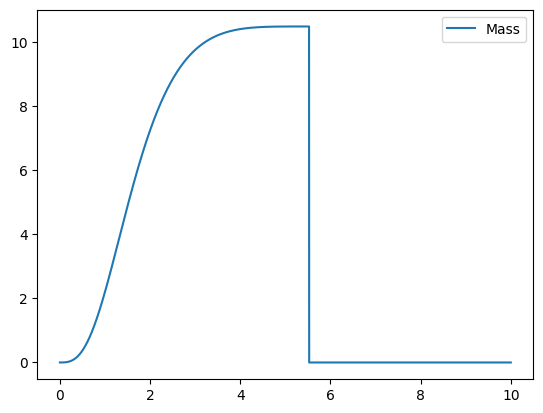

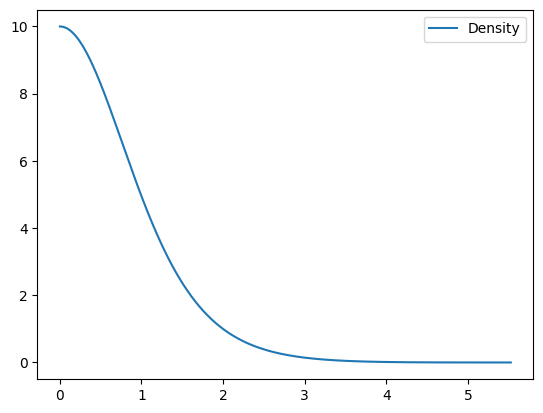

In [11]:

m2 = np.nan_to_num(M)
plt.plot(r,m2,label = 'Mass')
plt.legend()
plt.show()
plt.plot(r,rho,label = 'Density')
plt.legend()

I am getting something here but it doesn't relate to the question and to the mass at all although I am seeing some pattern of mass and density profiles. These are similiar to what we usually see for stars. Mass increases and density decreases.

And I am getting some nan = invalid or infinity values which suggests the mass cut off for some density.

It is clear that I now cannot choose a grid size as it will now depend solely on the equations.